<a href="https://colab.research.google.com/github/Francisco2963/EXAMEN-2-Machine-L/blob/main/EXAMEN_2_Francisco_Barrios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Versión E – Análisis de Ventas de Retail

Instrucciones para examen

Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de ventas de retail. Utilizaremos el «Retail Sales Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

# Contexto y Descripción del Dataset

El «Retail Sales Dataset» contiene datos históricos de ventas de retail, incluidos detalles sobre las ventas diarias de diversas categorías de productos. ***La tarea es predecir las ventas futuras basándose en varias características que describen productos, categorías y fechas de venta.***

# Diccionario de Datos:

Transaction ID: Un identificador único para cada transacción, que permite el seguimiento y la referencia.

Date: La fecha en que ocurrió la transacción, proporcionando información sobre las tendencias de ventas a lo largo del tiempo.

Customer ID: Un identificador único para cada cliente, que permite un análisis centrado en el cliente.

Gender: El género del cliente (Masculino/Femenino), ofreciendo información sobre patrones de compra basados en el género.

Age: La edad del cliente, facilitando la segmentación y exploración de influencias relacionadas con la edad.

Product Category: La categoría del producto comprado (por ejemplo, Electrónica, Ropa, Belleza), ayudando a entender las preferencias de productos.

Quantity: El número de unidades del producto comprado, contribuyendo a información sobre volúmenes de compra.


# Requisitos

# Limpieza de Datos:

Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

# Exploración de Datos:

Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

# Implementación de Modelos:

Modelos de Regresión: Implementa modelos de Decision Tree Regressor y Random Forest Regressor.

Optimización de Modelos: Utiliza GridSearchCV para optimizar los hiperparámetros de los modelos.

Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.

Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

# Entrega

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

Proceso completo de limpieza y preprocesamiento de datos.

Visualizaciones y estadísticas descriptivas.

Implementación y evaluación de los modelos de regresión.

Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

Consideraciones Éticas y Tecnológicas

Consideraciones Éticas:

Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.

Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

Consideraciones Tecnológicas:

Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.

Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.

Optimización de Modelos: Utiliza técnicas como GridSearchCV para optimizar los hiperparámetros y mejorar el rendimiento de los modelos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


COMENTARIO:

AL cargar el dataset, el archivo descargado contiene dos columnas mas de las indicadas en las "instrucciones para el examen", estas columnas son Price per Unit ( Precio por unidad) y Total Amount (Monto Total).

Total Amount, segun la explicacion de Kaggle es: el valor monetario total de la transacción, que muestra el impacto financiero de cada compra. (frase recuperada de: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset ) por lo tanto esta columna estaria netamente relacionada a las ventas, para nuestro analisis final, las ventas sera nuestra variable objetivo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


COMENTARIO

El archivo indica que tiene 1000 registros, desde la 0 hasta 999, tiene 9 columnas , en priemra instancia indica que no tiene valores nulos y sus tipos de datos son int64 y object.

En este primer analisis podemos ver que la columna Date es un objeto, esta columna esta relacionada con la fecha de las ventas por lo tanto una vez buscados los valores duplicados y los NaN , la columna date la camboaremos a Datetime

In [ ]:
df.duplicated().sum()
# No hay valores duplicados

0

In [ ]:
df.isnull().sum()
# no hay valores nulos

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df['Date'].value_counts()

,count
Date,
2023-05-16,11
2023-07-14,10
2023-05-23,9
2023-08-05,8
2023-02-05,8
...,...
2023-09-10,1
2023-02-16,1
2023-03-31,1


In [ ]:
from datetime import datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Age,1000.0,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Quantity,1000.0,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632


COMENTARIO

Al cambiar nuestra columna Date de object utilizando el metodo datetime, nos convirtio la columna a datetime64[ns].

Y al ejecutar un .describe( ) nos muestra la columna Date con su fecha (A/M/D, pero ademas con su hora (H/M/S)

Que significa datetime64[ns]?????

 este es un tipo de datos NumPy utilizado para representar fechas y horas con una precisión de nanosegundos. Es un tipo de datos genérico que puede contener cualquier fecha y hora dentro del rango admitido por NumPy, que va desde 1678-01-01 hasta 2262-04-11
Respuesta recuperada de:
https://www.linkedin.com/pulse/differences-between-datetime64ns-timestamp-pandas-malaviarachchi-iqipc/

Esto significa que la precision que podemos lograr mas adelante puede ser un factor determinante en nuestras predicciones.

Por el momento valmos a dividir la columna Date en varias columnas. Lo divideremos en las siguientes columnas:
Año

Mes

Dia

Hora

Minutos

Segundos

Despues veremos que pasa con esta decision

In [ ]:
df['Date'].unique()

<DatetimeArray>
['2023-11-24 00:00:00', '2023-02-27 00:00:00', '2023-01-13 00:00:00',
 '2023-05-21 00:00:00', '2023-05-06 00:00:00', '2023-04-25 00:00:00',
 '2023-03-13 00:00:00', '2023-02-22 00:00:00', '2023-12-13 00:00:00',
 '2023-10-07 00:00:00',
 ...
 '2023-09-26 00:00:00', '2023-07-04 00:00:00', '2023-05-30 00:00:00',
 '2023-10-21 00:00:00', '2023-09-03 00:00:00', '2023-03-02 00:00:00',
 '2023-08-02 00:00:00', '2023-04-17 00:00:00', '2023-03-30 00:00:00',
 '2023-05-28 00:00:00']
Length: 345, dtype: datetime64[ns]

COMENTARIO

Al ver los valores unicos de la columna date, podemos ver que ahora la fecha se encuentra acompañada de la hora, minutos y segundos, sin embargo , al parecer estos datos de hora, minutos y segundos son todos ceros

Buscaremos si hay datos de horas, minutos y segundos que contengan datos distintos de ceros

In [ ]:
horas = df['Date'].dt.hour
hay_horas_distintas_de_cero = (horas != 0).any()

if hay_horas_distintas_de_cero:
    print("La columna 'Date' contiene horas distintas de cero.")
else:
    print("La columna 'Date' no contiene horas distintas de cero.")


La columna 'Date' no contiene horas distintas de cero.


In [ ]:
minutos = df['Date'].dt.minute
hay_minutos_distintos_de_cero = (minutos != 0).any()

if hay_minutos_distintos_de_cero:
    print("La columna 'Date' contiene minutos distintos de cero.")

else:
    print("La columna 'Date' no contiene minutos distintos de cero.")

La columna 'Date' no contiene minutos distintos de cero.


In [ ]:
segundos = df['Date'].dt.second
hay_segundos_distintos_de_cero = (segundos != 0).any()

if hay_segundos_distintos_de_cero:
    print("La columna 'Date' contiene segundos distintos de cero.")
else:
    print("La columna 'Date' no contiene segundos distintos de cero.")

La columna 'Date' no contiene segundos distintos de cero.


COMENTARIO

Vemos que todos los datos de la hora,minutos y segundos son ceros, crearemos nuevas columnas para separar la fecha en Año, Mes, Dia, Hora, Minutos y Segundos para poder hacer agrupaciones con el metodo Groupby mas adelante

In [ ]:
df['Año'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day
df['Hora'] = df['Date'].dt.hour
df['Minutos'] = df['Date'].dt.minute
df['Segundos'] = df['Date'].dt.second

In [ ]:
df.head(5)
# ya tenemos nuestras nuevas columnas separando la columna Date

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Hora,Minutos,Segundos
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,0,0,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,0,0,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,0,0,0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,0,0,0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Hora              1000 non-null   int32         
 13  Minutos           1000 non-null   int32         
 14  Segundos          1000 no

Veremos las columnas creadas con sus valores unicos y asi confirmamos que las columnas de hora no tienen otros valores que no sean ceros

In [ ]:
df['Año'].unique()
# Tenemos dos años, 2023 y 2024

array([2023, 2024], dtype=int32)

In [ ]:
df['Mes'].unique()
# tenemos los meses del año en numeros pero desordenados, ¿Sera necesario ordenarlos?

array([11,  2,  1,  5,  4,  3, 12, 10,  8,  9,  6,  7], dtype=int32)

In [ ]:
df['Dia'].unique()
# tenemos nuestros dias, tambien desordenados

array([24, 27, 13, 21,  6, 25, 22,  7, 14, 30,  5, 17, 16, 15, 12, 29, 26,
        3, 23, 18,  4, 19,  2, 10, 31,  9,  1, 28,  8, 11, 20],
      dtype=int32)

In [ ]:
df['Hora'].unique()
# valor cero

array([0], dtype=int32)

In [ ]:
df['Minutos'].unique()
# valor cero

array([0], dtype=int32)

In [ ]:
df['Segundos'].unique()
# valor cero

array([0], dtype=int32)

In [ ]:
df['Total Amount'].dtype

dtype('int64')

In [ ]:
df['Total Amount'].unique()

array([ 150, 1000,   30,  500,  100,   50,  600,  200,   75, 1500,  120,
       2000,  900,  300, 1200,   90,   25,   60])

In [ ]:
df['Total Amount'].value_counts()

,count
Total Amount,
50,115
100,108
900,62
200,62
1200,54
30,51
500,51
25,51
1500,50


COMENTARIO

Ya tenemos todas nuestras columnas de tiempo identificadas y aun no decido que hacer con las columnas de hora, minutos y segundos

Revisaremos las 3 columnas categoricas para ver si tiene inconsistencias en su escritura

In [ ]:
df['Customer ID'].unique()

array(['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005', 'CUST006',
       'CUST007', 'CUST008', 'CUST009', 'CUST010', 'CUST011', 'CUST012',
       'CUST013', 'CUST014', 'CUST015', 'CUST016', 'CUST017', 'CUST018',
       'CUST019', 'CUST020', 'CUST021', 'CUST022', 'CUST023', 'CUST024',
       'CUST025', 'CUST026', 'CUST027', 'CUST028', 'CUST029', 'CUST030',
       'CUST031', 'CUST032', 'CUST033', 'CUST034', 'CUST035', 'CUST036',
       'CUST037', 'CUST038', 'CUST039', 'CUST040', 'CUST041', 'CUST042',
       'CUST043', 'CUST044', 'CUST045', 'CUST046', 'CUST047', 'CUST048',
       'CUST049', 'CUST050', 'CUST051', 'CUST052', 'CUST053', 'CUST054',
       'CUST055', 'CUST056', 'CUST057', 'CUST058', 'CUST059', 'CUST060',
       'CUST061', 'CUST062', 'CUST063', 'CUST064', 'CUST065', 'CUST066',
       'CUST067', 'CUST068', 'CUST069', 'CUST070', 'CUST071', 'CUST072',
       'CUST073', 'CUST074', 'CUST075', 'CUST076', 'CUST077', 'CUST078',
       'CUST079', 'CUST080', 'CUST081', 'CUST082', 

In [ ]:
df['Customer ID'].value_counts()

,count
Customer ID,
CUST001,1
CUST672,1
CUST659,1
CUST660,1
CUST661,1
...,...
CUST339,1
CUST340,1
CUST341,1


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'].isnull().sum()

0

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


In [ ]:
df['Gender'].sort_values()

,Gender
499,Female
420,Female
421,Female
422,Female
424,Female
...,...
454,Male
455,Male
458,Male
414,Male


In [ ]:
df['Gender'] = df['Gender'].str.upper()  # Convertir todos los valores a mayúsculas

In [ ]:
df['Gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


COMENTARIO

No hay inconsistencias de escritura en las 3 columnas categorcas

# Exploración de Datos:

Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Hora              1000 non-null   int32         
 13  Minutos           1000 non-null   int32         
 14  Segundos          1000 no

Contexto y Descripción del Dataset

El «Retail Sales Dataset» contiene datos históricos de ventas de retail, incluidos detalles sobre las ventas diarias de diversas categorías de productos.

La tarea es predecir las ventas futuras basándose en varias características que describen productos, categorías y fechas de venta.

Realizaremos algunas agrupaciones de columnas con el metodo groupby.

Crearemos una nueva columna que clasifique las ventas en categorías significativas (ej., ‘Alta’, ‘Media’, ‘Baja’).

Lo guarderemos en un nuevo DataFrame llamado df_1

In [ ]:
df_1 = df['Total Amount'].unique()
df_1
# Tenemos un array con las ventas

array([ 150, 1000,   30,  500,  100,   50,  600,  200,   75, 1500,  120,
       2000,  900,  300, 1200,   90,   25,   60])

In [ ]:
df_1 = df['Total Amount'].dtype
df_1

dtype('int64')

Para crear la columna 'categoria de ventas' ocupamos el metodo pd.cut que nos sirve para categorizar nuestros datos numericos de la columna Total Amount en intervalos definidos con float('int') cualquier valor superior a 1500 caera en la categoria 'Alta'

In [ ]:
bins = [0, 800, 1500, float('inf')]
labels = ['Baja', 'Media', 'Alta']

df_1 = df['categoria_ventas'] = pd.cut(df['Total Amount'], bins = bins, labels = labels)
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Hora,Minutos,Segundos,categoria_ventas
0,1,2023-11-24,CUST001,MALE,34,Beauty,3,50,150,2023,11,24,0,0,0,Baja
1,2,2023-02-27,CUST002,FEMALE,26,Clothing,2,500,1000,2023,2,27,0,0,0,Media
2,3,2023-01-13,CUST003,MALE,50,Electronics,1,30,30,2023,1,13,0,0,0,Baja
3,4,2023-05-21,CUST004,MALE,37,Clothing,1,500,500,2023,5,21,0,0,0,Baja
4,5,2023-05-06,CUST005,MALE,30,Beauty,2,50,100,2023,5,6,0,0,0,Baja


Para poder agrupar por categoria como producto y tienda, debemos crear la columna tienda

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


Crearemos un diccionario que este relacionado con la columna Product Category para poder asignar una tienda a cada fila del DataFrame

In [ ]:
df['Tienda'] = df['Product Category']

dicc = {'Clothing': 1, 'Electronics': 2, 'Beauty': 3}
df['Tienda'] = df['Tienda'].map(dicc)

df.head(5)
# Con el diccionario creamos nuestra columna Tienda basada en la categoria de producto, para cada categoria una tienda

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Hora,Minutos,Segundos,categoria_ventas,Tienda
0,1,2023-11-24,CUST001,MALE,34,Beauty,3,50,150,2023,11,24,0,0,0,Baja,3
1,2,2023-02-27,CUST002,FEMALE,26,Clothing,2,500,1000,2023,2,27,0,0,0,Media,1
2,3,2023-01-13,CUST003,MALE,50,Electronics,1,30,30,2023,1,13,0,0,0,Baja,2
3,4,2023-05-21,CUST004,MALE,37,Clothing,1,500,500,2023,5,21,0,0,0,Baja,1
4,5,2023-05-06,CUST005,MALE,30,Beauty,2,50,100,2023,5,6,0,0,0,Baja,3


In [ ]:
df.info()
# Podemos vr nuestras dos nuevas columnas creadas para hacer las visualizaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Hora              1000 non-null   int32         
 13  Minutos           1000 non-null   int32         
 14  Segundos          1000 no

Realizaremos algunas agrupaciones de columnas con el metodo groupby.

Calcularemos la cantidad vendida por cada producto

In [ ]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
df['Quantity'].unique()

array([3, 2, 1, 4])

In [ ]:
cantidad_vendida = df.groupby('Product Category')['Quantity'].sum()
cantidad_vendida
# Cantidad vendida por categorias de productos

,Quantity
Product Category,
Beauty,771
Clothing,894
Electronics,849


In [ ]:
productos_vendidos = df.groupby('Tienda')['Product Category'].count()
productos_vendidos
# Productos vendidos por tiendas

,Product Category
Tienda,
1,351
2,342
3,307


In [ ]:
ventas_por_tienda = df.groupby('Tienda')['Total Amount'].sum()
ventas_por_tienda
# Ventas por tienda

,Total Amount
Tienda,
1,155580
2,156905
3,143515


In [ ]:
ventas_por_mes = df.groupby('Mes')['Total Amount'].count()
ventas_por_mes
# Ventas totales por mes

,Total Amount
Mes,
1,78
2,85
3,73
4,86
5,105
6,77
7,72
8,94
9,65


In [ ]:
producto_mas_vendido = df.groupby(['Tienda','Product Category'])['Quantity'].sum().reset_index()
producto_mas_vendido

,Tienda,Product Category,Quantity
0,1,Clothing,894
1,2,Electronics,849
2,3,Beauty,771


In [ ]:
suma_ventas_por_producto_año = df.groupby(['Product Category','Año'])['Total Amount'].sum()
suma_ventas_por_producto_año

Product Category  Año 
Beauty            2023    142015
                  2024      1500
Clothing          2023    155580
Electronics       2023    156875
                  2024        30
Name: Total Amount, dtype: int64

In [ ]:
suma_ventas_por_producto_mes = df.groupby(['Product Category','Mes'])['Total Amount'].sum()
suma_ventas_por_producto_mes

Product Category  Mes
Beauty            1      13930
                  2      14035
                  3      10545
                  4      11905
                  5      12450
                  6      10995
                  7      16090
                  8       9790
                  9       6320
                  10     15355
                  11      9700
                  12     12400
Clothing          1      13125
                  2      14560
                  3      15065
                  4      13940
                  5      17455
                  6      10170
                  7       8250
                  8      12455
                  9       9975
                  10     13315
                  11     15200
                  12     12070
Electronics       1       9925
                  2      15465
                  3       3380
                  4       8025
                  5      23245
                  6      15550
                  7      11125
                  8      14715
                  9       7325
                  10     17910
                  11     10020
                  12     20220
Name: Total Amount, dtype: int64

In [ ]:
grouped = df.groupby(['Product Category', 'Mes'])
ventas_por_producto_y_mes = grouped['Total Amount'].agg(['sum', 'mean'])
ventas_por_producto_y_mes
# suma y promedio de proudcto vendido por mes

sum        mean
Product Category Mes                   
Beauty           1    13930  535.769231
                 2    14035  539.807692
                 3    10545  502.142857
                 4    11905  410.517241
                 5    12450  444.642857
                 6    10995  439.800000
                 7    16090  595.925926
                 8     9790  407.916667
                 9     6320  316.000000
                 10   15355  495.322581
                 11    9700  388.000000
                 12   12400  496.000000
Clothing         1    13125  504.807692
                 2    14560  441.212121
                 3    15065  396.447368
                 4    13940  387.222222
                 5    17455  471.756757
                 6    10170  363.214286
                 7     8250  434.210526
                 8    12455  389.218750
                 9     9975  498.750000
                 10   13315  443.833333
                 11   15200  584.615385
                 12   12070  464.230769
Electronics      1     9925  381.730769
                 2    15465  594.807692
                 3     3380  241.428571
                 4     8025  382.142857
                 5    23245  581.125000
                 6    15550  647.916667
                 7    11125  427.884615
                 8    14715  387.236842
                 9     7325  293.000000
                 10   17910  511.714286
                 11   10020  371.111111
                 12   20220  505.500000

In [ ]:
grouped = df.groupby(['Tienda', 'Año'])
ventas_por_tienda_y_año = grouped['Total Amount'].agg(['sum','count'])
ventas_por_tienda_y_año
# Cantidad de ventas por tienda y monto total vendido por cada tienda en el año

sum  count
Tienda Año                
1      2023  155580    351
2      2023  156875    341
       2024      30      1
3      2023  142015    306
       2024    1500      1

In [ ]:
ventas_por_tienda_y_año.index

MultiIndex([(1, 2023),
            (2, 2023),
            (2, 2024),
            (3, 2023),
            (3, 2024)],
           names=['Tienda', 'Año'])

In [ ]:
ventas_por_tienda_y_año.values

array([[155580,    351],
       [156875,    341],
       [    30,      1],
       [142015,    306],
       [  1500,      1]])

In [ ]:
promedio_ventas_por_tienda = df.groupby('Tienda')['Total Amount'].mean()
promedio_ventas_por_tienda

,Total Amount
Tienda,
1,443.247863
2,458.786550
3,467.475570


In [ ]:
# Desviación estándar de las ventas por tienda
desviacion_estandar_ventas = df.groupby('Tienda')['Total Amount'].std()
desviacion_estandar_ventas

,Total Amount
Tienda,
1,550.695917
2,567.540150
3,563.612788


COMENTARIO

La desviacion estandar de las 3 tiendas muestran un valor alto, lo que indica que las ventas en las 3 tiendas varian mucho de un dia a otro o de un periodo a otro.

In [ ]:
# Varianza de las ventas por tienda
varianza_ventas = df.groupby('Tienda')['Total Amount'].var()
varianza_ventas

,Total Amount
Tienda,
1,303265.992674
2,322101.822341
3,317659.374401


# VISUALIZACION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Hora,Minutos,Segundos,categoria_ventas,Tienda
0,1,2023-11-24,CUST001,MALE,34,Beauty,3,50,150,2023,11,24,0,0,0,Baja,3
1,2,2023-02-27,CUST002,FEMALE,26,Clothing,2,500,1000,2023,2,27,0,0,0,Media,1
2,3,2023-01-13,CUST003,MALE,50,Electronics,1,30,30,2023,1,13,0,0,0,Baja,2
3,4,2023-05-21,CUST004,MALE,37,Clothing,1,500,500,2023,5,21,0,0,0,Baja,1
4,5,2023-05-06,CUST005,MALE,30,Beauty,2,50,100,2023,5,6,0,0,0,Baja,3


In [ ]:
df.duplicated().sum()

0

In [ ]:
fil_ventas = cantidad_vendida = df.groupby('Product Category')['Total Amount'].sum()
fil_ventas

,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


In [ ]:
fil_ventas.index

Index(['Beauty', 'Clothing', 'Electronics'], dtype='object', name='Product Category')

In [ ]:
fil_ventas.values

array([143515, 155580, 156905])

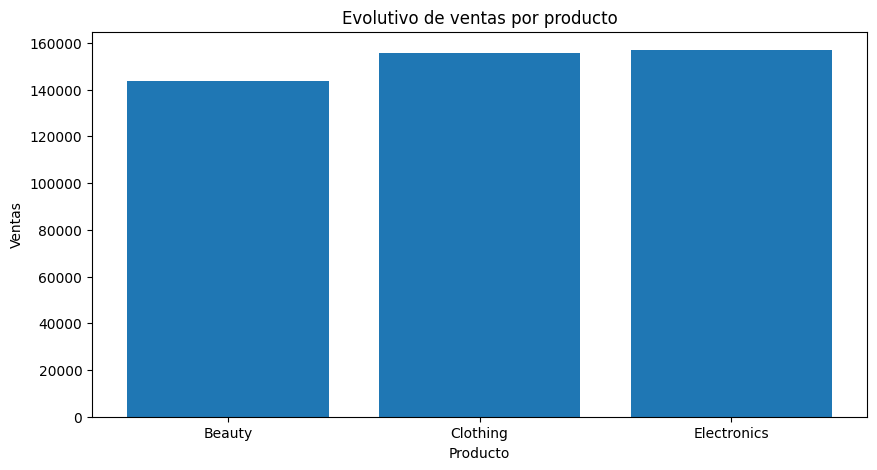

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(fil_ventas.index, fil_ventas.values)
plt.title('Evolutivo de ventas por producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
#plt.xticks(rotation = 70)
plt.show()

Este grafico muestra las ventas de las tienda , en el cual la tienda que vende productos electronicos es la que tiene mayores ingresos por ventas

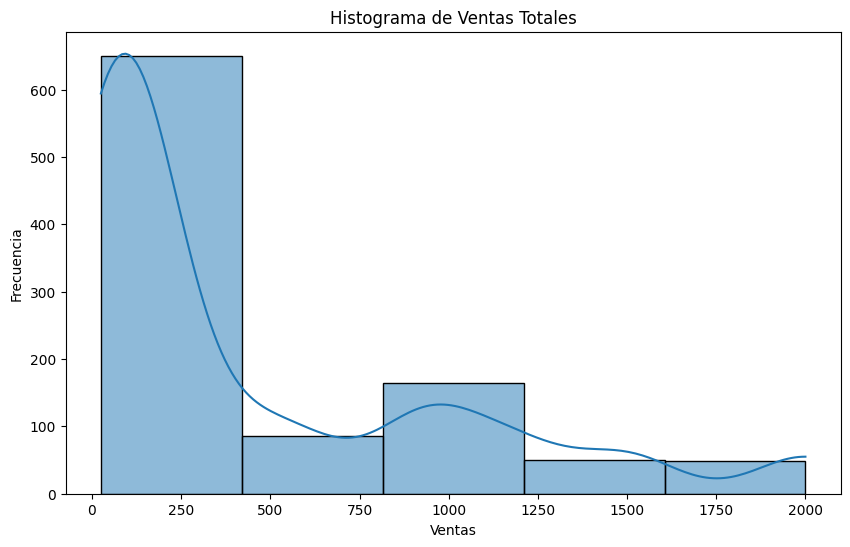

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'],bins= 5, kde=True)
plt.title("Histograma de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

En el Histograma de ventas de los 3 tipos de tiendas podemos ver que las ventas de poco valor son las que mas se realizan,teniendo el pico por sobre las 650 unidades vendidas en productos con valores no superiores a los 450 aprox, sin embargo el grafico muestra que la curva de ventas baja significativamente hacia las ventas mas altas, llegando a vender alrededor de 150 unidades por un valor cercano a los 1000, lo que es muy bajo para la tienda de retail

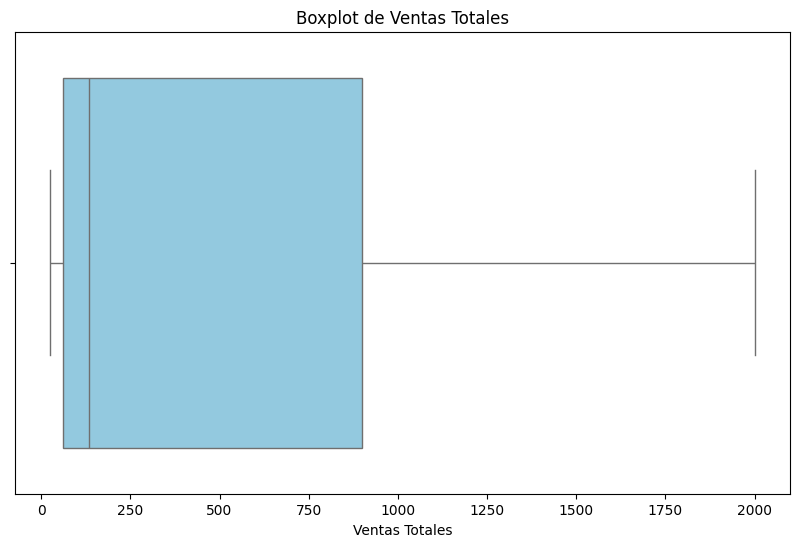

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total Amount', data=df, color='skyblue')
plt.title("Boxplot de Ventas Totales")
plt.xlabel("Ventas Totales")
plt.show()

El boxplot de ventas totales corrobora lo analizado en el Histograma de ventas totales, se puede apreciar que los bigotes del boxplot se encuentran entre 0 y 2000 lo que siguiere que algunas tiendas no venden nada y otras venden 2000 (muy pocas tiendas venden esa cantidad) el boxplot no muestra valores atipicos o outlier fuera de sus bigotes.

Como muestra la caja, el rango de ventas de las 3 tiendas esta entre los 50 y los 900, sin embargo la media se encuentra alrededor de los 150 con una inclinacion bien definida hacia la derecha, lo que indica que hay un numero impoortante de tiendas que ganan entre los 150 y los 900.

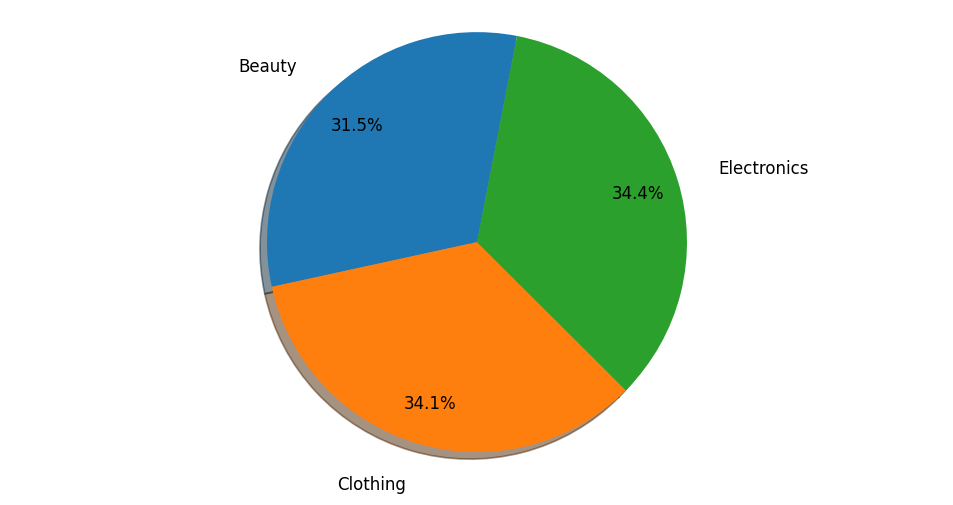

In [ ]:
fig1 = plt.figure(dpi = 120,figsize=(10,5))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.pie(fil_ventas.values,labels=fil_ventas.index,autopct='%1.1f%%',shadow = True,startangle=79, pctdistance=0.8,labeldistance=1.2)
ax1.axis('equal')
plt.show()

El grafico de torta muestra el porcentaje de ventas por productos de las tiendas 1,2 y 3 en los años 2023 y 2024. Donde el producto electronic tiene el mayor porcentaje de ventas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Hora              1000 non-null   int32         
 13  Minutos           1000 non-null   int32         
 14  Segundos          1000 no

In [ ]:
correlation_matrix = df[['Transaction ID','Date','Age','Quantity','Price per Unit',
                           'Total Amount','Año','Mes','Dia',
                           'Hora','Minutos','Segundos','Tienda']].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                Transaction ID      Date       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.045136  0.065191 -0.026623       -0.060837   
Date                  0.045136  1.000000  0.005971 -0.022356       -0.003566   
Age                   0.065191  0.005971  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.022356 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.003566 -0.038423  0.017501        1.000000   
Total Amount         -0.075034  0.001869 -0.060568  0.373707        0.851925   
Año                  -0.010855  0.077422  0.023269 -0.020324        0.020097   
Mes                   0.047538  0.985296 -0.000640 -0.021803       -0.008161   
Dia                  -0.005052  0.058982  0.041899  0.029650        0.018303   
Hora                       NaN       NaN       NaN       NaN             NaN   
Minutos                    NaN       NaN       NaN       NaN             NaN   
Segundos      

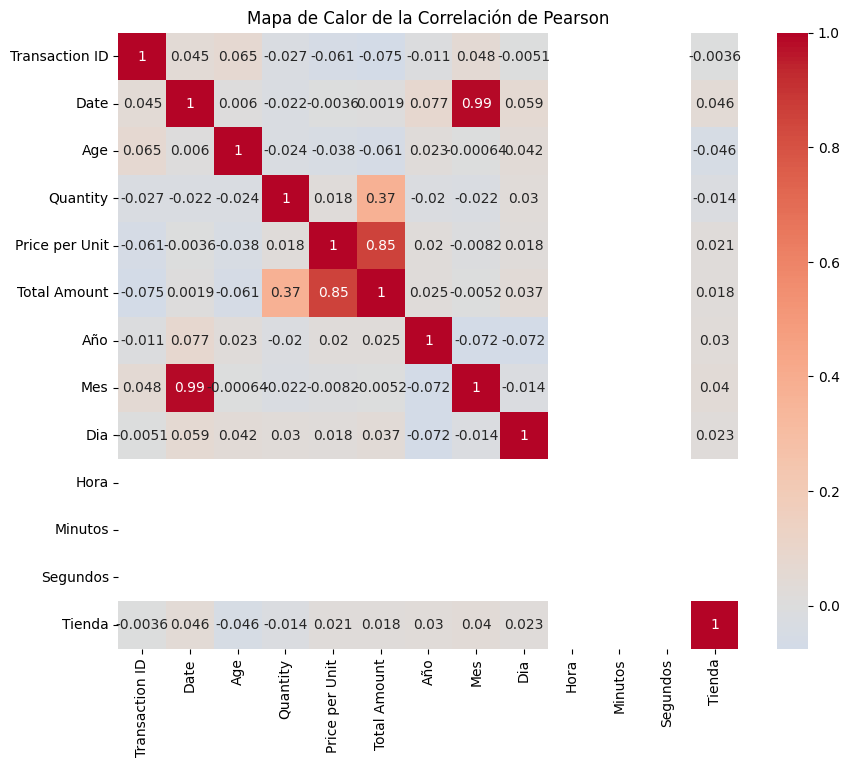

In [ ]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO

Podemos ver en nuestra matriz de correlacion que las columnas hora, minutos y segundos NO TIENEN  ninguna correlacion con las columnas, por lo tamto para nuestro analisis de ML vamos a eliminar esas columnas de nuestro DataFrame

TRealizaremos nuevamente la matriz de correlacion, pero esta vez dejaremos fuera las variables de hora, minutos y segundos

In [ ]:
correlation_matrix = df[['Transaction ID','Date','Age','Quantity','Price per Unit',
                           'Total Amount','Año','Mes','Dia',
                           'Tienda']].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                Transaction ID      Date       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.045136  0.065191 -0.026623       -0.060837   
Date                  0.045136  1.000000  0.005971 -0.022356       -0.003566   
Age                   0.065191  0.005971  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.022356 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.003566 -0.038423  0.017501        1.000000   
Total Amount         -0.075034  0.001869 -0.060568  0.373707        0.851925   
Año                  -0.010855  0.077422  0.023269 -0.020324        0.020097   
Mes                   0.047538  0.985296 -0.000640 -0.021803       -0.008161   
Dia                  -0.005052  0.058982  0.041899  0.029650        0.018303   
Tienda               -0.003588  0.046449 -0.045932 -0.013504        0.021133   

                Total Amount       Año       Mes       Dia    Tienda  
Transaction ID     -0.

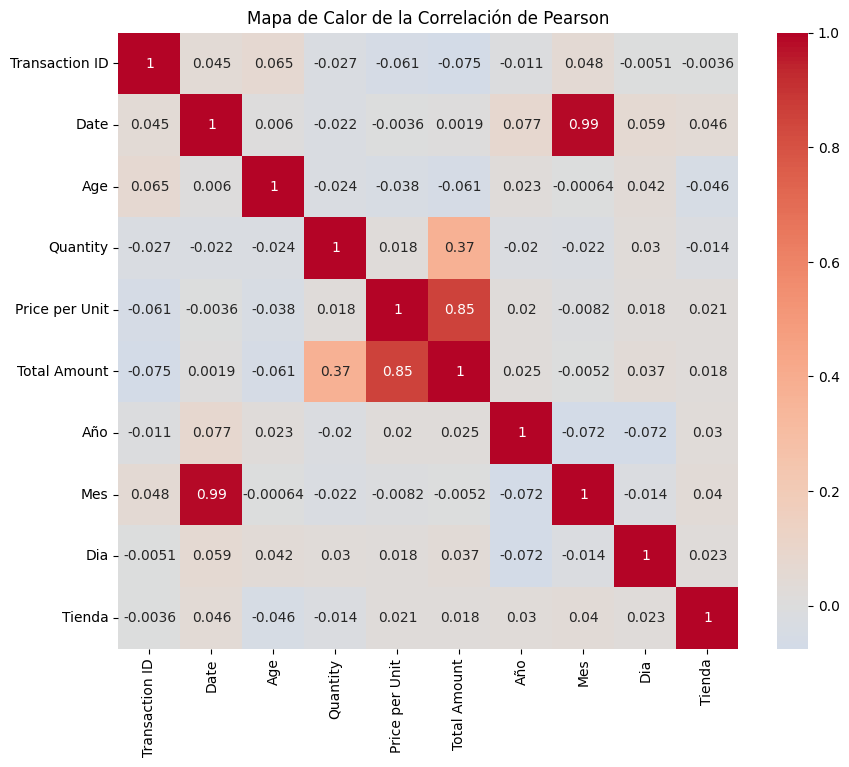

In [ ]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO MATRIZ DE CALOR

Hay un correlacion fuerte entre total amount (nuestra variable objetivo) y price per unit, esto tiene sentido ya que la variable objetivo son las ventas totales de las categorias de los productos, tambien hay una corrrelacion con quantity, que sigue teniendo sentido, ya que es la cantidad de productos vendidos, sin embargo pensaba que la correlacion entre estas 3 variables iba a ser mucho mas fuerte.

Me llama la atencion lo poco relacionado que esta la columna date con las 3 columnas anteriores, ya que deberia mostrar por lo menos en las columnas que creamos ( Año, Mes y Dia) alguna correlacion fuerte relacionada a las ventas en los meses o dias, esto se podria deber a que las ventas se concentran demaciado solo en algunos meses y en esos meses de concentracion de ventas en algunos dias especificos.

In [ ]:
tiendas = df['Tienda'].unique()
tiendas

array([3, 1, 2])

In [ ]:
tiendas = df['Tienda'].unique()
df_2 = df[df['Tienda'] == tiendas[0]]
df_3 = df[df['Tienda'] == tiendas[1]]
df_4 = df[df['Tienda'] == tiendas[2]]

(0.0, 2200.0)

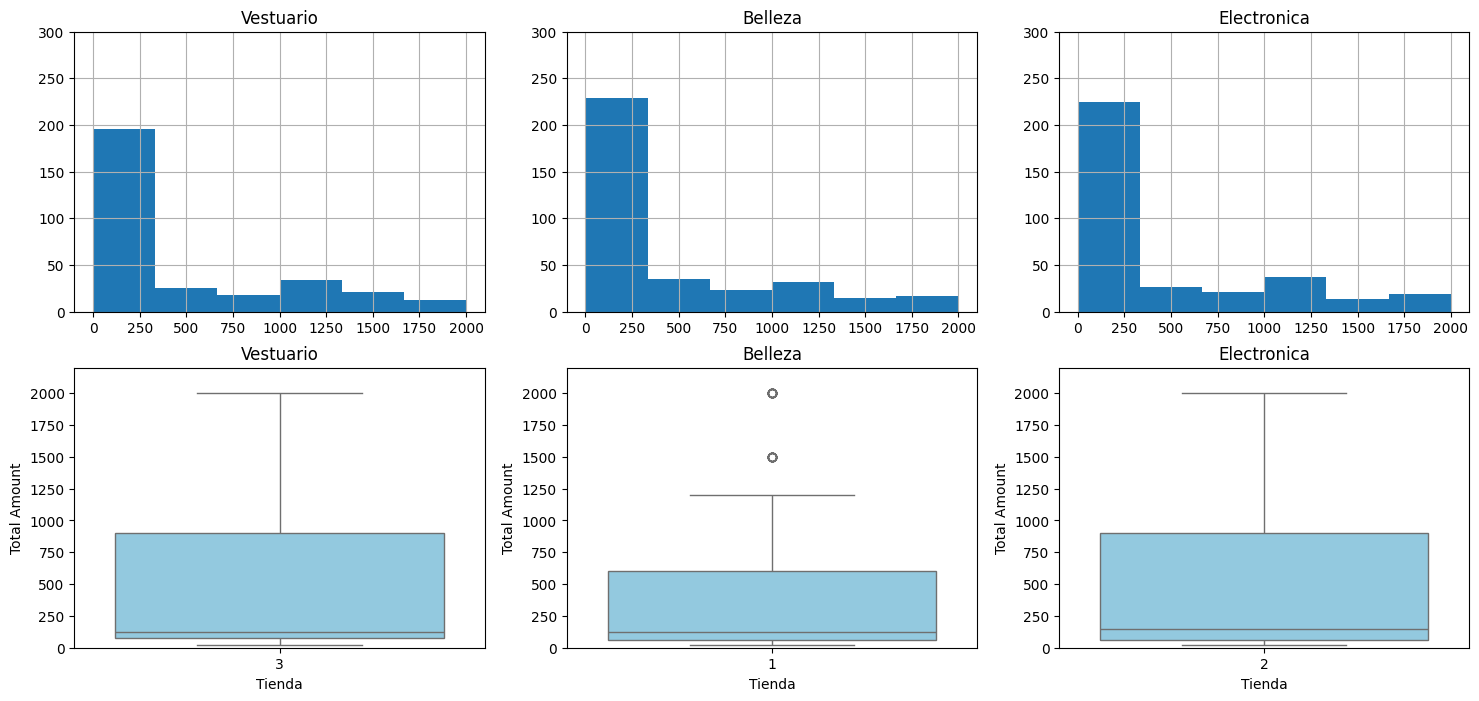

In [ ]:
#Creamos manualmente cada histograma
plt.figure(figsize=(18,8))
#subplot1
plt.subplot(2,3,1)
df[df["Tienda"] == tiendas[0]]["Total Amount"].hist(bins=6,range=(0,2000))
plt.title('Vestuario')
plt.ylim(0, 300)

#subplot2
plt.subplot(2,3,2)
df[df["Tienda"] == tiendas[1]]["Total Amount"].hist(bins=6, range=(0,2000))
plt.title('Belleza')
plt.ylim(0, 300)

#subplot3
plt.subplot(2,3,3)
df[df["Tienda"] == tiendas[2]]["Total Amount"].hist(bins=6, range=(0,2000))
plt.title('Electronica')
plt.ylim(0, 300)

#subplot4
plt.subplot(2,3,4)
sns.boxplot(x='Tienda', y='Total Amount', data=df_2, color='skyblue')
plt.title('Vestuario')
plt.ylim(0, 2200)

#subplot5
plt.subplot(2,3,5)
sns.boxplot(x='Tienda', y='Total Amount', data=df_3, color='skyblue')
plt.title('Belleza')
plt.ylim(0, 2200)

#subplot6
plt.subplot(2,3,6)
sns.boxplot(x='Tienda', y='Total Amount', data=df_4, color='skyblue')
plt.title('Electronica')
plt.ylim(0, 2200)

COMENTARIO

En estos graficos 'subplot' podemos ver las ventas por tiendas o por categorias de ventas (ya que cada tienda representa una categoria de ventas). Podemos ver quer las ventas de menos valores son las que mas venden las 3 tiendas, Asi lo refejan los histogramas y los boxplot de las tiendas, es interezante destacar que en el boxplot de la tienda belleza aparece un valor atipico, hasta el momento no noos habiamos puesto atencion en estos valores.


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Hora,Minutos,Segundos,categoria_ventas,Tienda
0,1,2023-11-24,CUST001,MALE,34,Beauty,3,50,150,2023,11,24,0,0,0,Baja,3
1,2,2023-02-27,CUST002,FEMALE,26,Clothing,2,500,1000,2023,2,27,0,0,0,Media,1
2,3,2023-01-13,CUST003,MALE,50,Electronics,1,30,30,2023,1,13,0,0,0,Baja,2
3,4,2023-05-21,CUST004,MALE,37,Clothing,1,500,500,2023,5,21,0,0,0,Baja,1
4,5,2023-05-06,CUST005,MALE,30,Beauty,2,50,100,2023,5,6,0,0,0,Baja,3


# ELININACION DE COLUMNAS QUE NO SIRVEN PARA EL MODELAMIENTO.

He decidido elimiar algunas columnas del Dataframe, ya que a mi juicio no sirven para los modelos que confeccionaremos a continuacion.

las columnas que vamos a eliminar son:

Hora

Minutos

Segundos

Estas columnas no tienen ningun valor, si bien son numericas, estas columnas son puros ceros y podrian convertir nuestro DataFrame al moento de las transformaciones en una MATRIZ DISPERSA.

Otra columna que vamos a eliminar es la columna categoria_ventas, ya que creamos la columna para realziar agrupaciones.

Vere mas adelante que hacer con dos columnas que no tengo claro si sirven o no para el modelamiento, estas columnas son Transaccion ID ( ID de transaccion) y la columna Customer ID (ID del cliente), lo resolveremos una vez identifiquemos los valores outliers del DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Hora              1000 non-null   int32         
 13  Minutos           1000 non-null   int32         
 14  Segundos          1000 no

In [ ]:
df = df.drop(['Hora','Minutos','Segundos','categoria_ventas'], axis = 1)

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Tienda
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000,15.310000,1.956000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000,1.000000,1.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000,7.000000,1.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000,15.000000,2.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000,23.000000,3.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000,31.000000,3.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755,8.871674,0.810383


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Tienda            1000 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(6), object(3)
memory usage: 90.0+ KB


# VAMOS A BUSCAR LOS VALORES ATIPICOS O OUTLIERS

Realizaremos una funcion donde utilizaremos los cuartiles para encontrar los outliers.

Nuestra variable objetivo es Total Amount (cantidad total) relacionada con las ventas, la funcion recorrera los cuartiles buscando los outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def calcular_outliers(df, columna):
  if df[columna].dtype == 'object':

    return None, None, None, None

  else:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return outliers, Q1, Q3, IQR

outliers_Transaction_ID, Q1_Transaction_ID, Q3_Transaction_ID, IQR_Transaction_ID = calcular_outliers(df, 'Transaction ID')
outliers_Date, Q1_Date, Q3_Date, IQR_Date = calcular_outliers(df, 'Date')
outliers_Age, Q1_Age, Q3_Age, IQR_Age = calcular_outliers(df, 'Age')
outliers_Quantity, Q1_Quantity, Q3_Quantity, IQR_Quantity = calcular_outliers(df, 'Quantity')
outliers_Price_per_Unit, Q1_Price_per_Unit, Q3_Price_per_Unit, IQR_Price_per_Unit = calcular_outliers(df, 'Price per Unit')
outliers_Total_Amount, Q1_Total_Amount, Q3_Total_Amount, IQR_Total_Amount = calcular_outliers(df, 'Total Amount')
outliers_Año, Q1_Año, Q3_Año, IQR_Año = calcular_outliers(df, 'Año')
outliers_Mes, Q1_Mes, Q3_Mes, IQR_Mes = calcular_outliers(df, 'Mes')
outliers_Dia, Q1_Dia, Q3_Dia, IQR_Dia = calcular_outliers(df, 'Dia')
outliers_Tienda, Q1_Tienda, Q3_Tienda, IQR_Tienda = calcular_outliers(df, 'Tienda')


print(f'Outliers en Transaction ID: \n{len(outliers_Transaction_ID)}')
print()
print(f'Outliers en Date: \n{len(outliers_Date)}')
print()
print(f'Outliers en Age: \n{len(outliers_Age)}')
print()
print(f'Outliers en Quuantity: \n{len(outliers_Quantity)}')
print()
print(f'Outliers en Price_per_Unit: \n{len(outliers_Price_per_Unit)}')
print()
print(f'Outliers en Total_Amount: \n{len(outliers_Total_Amount)}')
print()
print(f'Outliers en Año: \n{len(outliers_Año)}')
print()
print(f'Outliers en Mes: \n{len(outliers_Mes)}')
print()
print(f'Outliers en Dia: \n{len(outliers_Dia)}')
print()
print(f'Outliers en Tienda: \n{len(outliers_Tienda)}')
print()




Outliers en Transaction ID: 
0

Outliers en Date: 
0

Outliers en Age: 
0

Outliers en Quuantity: 
0

Outliers en Price_per_Unit: 
0

Outliers en Total_Amount: 
0

Outliers en Año: 
2

Outliers en Mes: 
0

Outliers en Dia: 
0

Outliers en Tienda: 
0



In [ ]:
df['Año'].unique()

array([2023, 2024], dtype=int32)

In [ ]:
df['Año'].value_counts()

,count
Año,
2023,998
2024,2


COMENTARIO

El DataFrame no tiene valores outliers, al buscar valores atipicos en las columnas numericas, solo arrojo dos outliers en la columna creada año, sin embargo estos valores se relacionan con los dos valores para el año 2024, por lo tanto no son outliers

COMENTARIO FINAL PRIMERA PARTE

Hemos limpiado el dataset, no hemos encontrado valores duplicados, tampoco valores nulos, tampoco valores outliers.

Hemos creados algunas columnas para crear visualziaciones, estas visulaizaciones nos han mostrado que los 3 productos tienen ventas muy parecidas, donde pudimos ver en los graficos que las ventas de poco valor son las que mas se venden en los 3 tipos de categorias de ventas, siendo la categoria Electronic la mas vendida pero seguida muy de cerca por los productos de belleza y en tercer lugar los productos relacionados con el vestuario

# PREPROCESAMIENTO

# Contexto y Descripción del Dataset

El «Retail Sales Dataset» contiene datos históricos de ventas de retail, incluidos detalles sobre las ventas diarias de diversas categorías de productos. La tarea es predecir las ventas futuras basándose en varias características que describen productos, categorías y fechas de venta.

# COMENTARIO VARIABLE OBJETIVO

Para poder predecir las ventas futuras, nuestra variable objetivo es Total Amount, ya que esta variable es lo mismo si dijeramos ventas totales por categoria.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Año               1000 non-null   int32         
 10  Mes               1000 non-null   int32         
 11  Dia               1000 non-null   int32         
 12  Tienda            1000 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(6), object(3)
memory usage: 90.0+ KB


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Año,Mes,Dia,Tienda
0,1,2023-11-24,CUST001,MALE,34,Beauty,3,50,150,2023,11,24,3
1,2,2023-02-27,CUST002,FEMALE,26,Clothing,2,500,1000,2023,2,27,1
2,3,2023-01-13,CUST003,MALE,50,Electronics,1,30,30,2023,1,13,2
3,4,2023-05-21,CUST004,MALE,37,Clothing,1,500,500,2023,5,21,1
4,5,2023-05-06,CUST005,MALE,30,Beauty,2,50,100,2023,5,6,3


COMENTARIO

Elinaremos algunas columnas de nuestro DataFrame que a mijuicio no aportan informacion para el analisis y el modelamiento.

Elinaremos la columna Transaction ID ya que si bien es un identificador de la transaccion, se podria decir que la columna customer ID entrega la misma informacion,

Elinaremos la columna original product category, ya que creamos la columna Tienda que ya es numerica y representan exactamente lo mismo.

Por ultimo elimaremosla columna date y dejaremos las 3 columnas que creamos para separar la columna Date, ya que eliminaremos la columna date entera porque no queremos que el modelo trabaje con informacion repetida (seria el caso, con las columnas creadas).



In [ ]:
df = df.drop(['Transaction ID','Date','Customer ID' ,'Product Category'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1000 non-null   object
 1   Age             1000 non-null   int64 
 2   Quantity        1000 non-null   int64 
 3   Price per Unit  1000 non-null   int64 
 4   Total Amount    1000 non-null   int64 
 5   Año             1000 non-null   int32 
 6   Mes             1000 non-null   int32 
 7   Dia             1000 non-null   int32 
 8   Tienda          1000 non-null   int64 
dtypes: int32(3), int64(5), object(1)
memory usage: 58.7+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1000 non-null   object
 1   Age             1000 non-null   int64 
 2   Quantity        1000 non-null   int64 
 3   Price per Unit  1000 non-null   int64 
 4   Total Amount    1000 non-null   int64 
 5   Año             1000 non-null   int32 
 6   Mes             1000 non-null   int32 
 7   Dia             1000 non-null   int32 
 8   Tienda          1000 non-null   int64 
dtypes: int32(3), int64(5), object(1)
memory usage: 58.7+ KB


COMENTARIO

Despues de eliminar las columnas repetidas que contenian la misma informacion, nos ha quedado un DataFrame com 7 columnas, de las cuales dos son columnas categoricas

las columnas categoricas las podemos procesar con OneHotEncoder ya que son columnas nominales, el problema que se presenta con este proceso es que la columna Customer ID tiene 1000 valores distintos, por lo tamto al aplicar OHE nos crearia mil columnas nuevas.
La mejor eleccion para procesar estas dos columnas categoricas es LabelEncoder ya que  a diferencia de la codificación One-Hot, la codificación de etiquetas asigna un número entero único a cada categoría, con este metodo mantenemos el numero de columnas

# Implementación de Modelos:

Modelos de Regresión: Implementa modelos de Decision Tree Regressor y Random Forest Regressor.

Optimización de Modelos: Utiliza GridSearchCV para optimizar los hiperparámetros de los modelos.

Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.

Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
y = df['Total Amount']
X = df.drop('Total Amount', axis = 'columns')

In [ ]:
X

,Gender,Age,Quantity,Price per Unit,Año,Mes,Dia,Tienda
0,MALE,34,3,50,2023,11,24,3
1,FEMALE,26,2,500,2023,2,27,1
2,MALE,50,1,30,2023,1,13,2
3,MALE,37,1,500,2023,5,21,1
4,MALE,30,2,50,2023,5,6,3
...,...,...,...,...,...,...,...,...
995,MALE,62,1,50,2023,5,16,1
996,MALE,52,3,30,2023,11,17,3
997,FEMALE,23,4,25,2023,10,29,3
998,FEMALE,36,3,50,2023,12,5,2


In [ ]:
y

,Total Amount
0,150
1,1000
2,30
3,500
4,100
...,...
995,50
996,90
997,100
998,150


COMENTARIO

si bien nuestra columna target es numerica, le aplicaremos igual el LabelEncoder

In [ ]:
label = LabelEncoder()
y = label.fit_transform(y)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1000 non-null   object
 1   Age             1000 non-null   int64 
 2   Quantity        1000 non-null   int64 
 3   Price per Unit  1000 non-null   int64 
 4   Año             1000 non-null   int32 
 5   Mes             1000 non-null   int32 
 6   Dia             1000 non-null   int32 
 7   Tienda          1000 non-null   int64 
dtypes: int32(3), int64(4), object(1)
memory usage: 50.9+ KB


# CODIFICACION DE LA COLUMNA GENDER POR FUERA DE COLUMNTRANSFORMER Y PIPELINE

No pude encontrar la solucion en el ColumTranformer y pipeline de la linea 436 de mas abajo. El error que se ejecutaba en el entrenamiento del modelo en la linea de codigo 441 mas abajo dice lo siguiente:

El mensaje de error "ValueError: could not convert string to float: 'FEMALE'" te indica que el modelo está intentando convertir un valor de texto (en este caso, "FEMALE") a un número decimal (float), y esto no es posible directamente. Esto suele ocurrir cuando hay variables categóricas (como "FEMALE" o "MALE") que el modelo espera que sean numéricas.

(traduccion del error recuperada de la inteligencia artificial Gemini)

Debido a esto es que la umica solucion que se me ocurrio fue transformar la columna gender antes de entrar a los transformadores, ColumnTransformer y pipeline, Con esta solucion pudo avanzar el entrenamiento.

Agradecere Jesus me pueda explicar porque no se pudo transformar la variable gender en los transformadores y pipeline como se muestra el codigo en la linea 436, pensaba que los pasos estaban bien hechos y si bien se ejecutaban los codigos bien desde la linea 435 hasta la linea 437, al llegar a la linea 439 donde se realizan las predicciones, se ejecutaba el error que se adjunta en la siguiente linea de codigo.

In [ ]:
# Codificar la columna "Gender por fuera del transformador"
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# ERROR AL ENTRENAR EL ARBOL


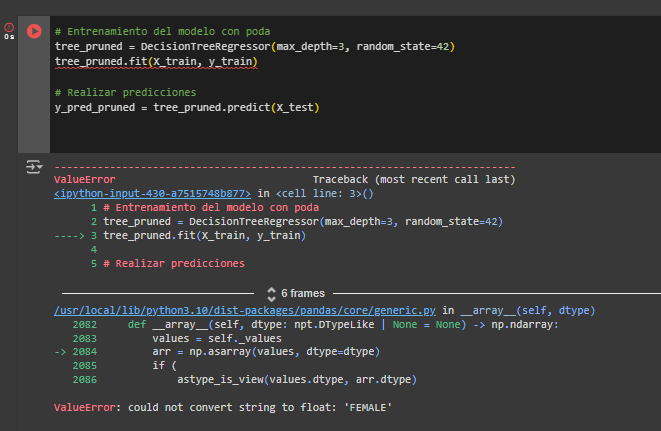

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   Age             1000 non-null   int64
 2   Quantity        1000 non-null   int64
 3   Price per Unit  1000 non-null   int64
 4   Año             1000 non-null   int32
 5   Mes             1000 non-null   int32
 6   Dia             1000 non-null   int32
 7   Tienda          1000 non-null   int64
dtypes: int32(3), int64(5)
memory usage: 50.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#columnas numericas
variables_num =["Age","Quantity","Price per Unit","Año","Mes","Dia","Tienda" ]
num_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)

#columnas categoricas NOTA: linea original antes del error y codificacion de gender por fuera
variabled_cat =["Gender"]
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("onehot",  OneHotEncoder(handle_unknown="ignore"))  # Codificación categorica
    ]
)

#se incluye un columntransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num",num_transformer,variables_num),
        ("cat",cat_transformer,variabled_cat)
    ]
)

# Pipeline final que incluye imputación condicional categórica, numerica y modelo
pipeline_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=10))
])

pipeline_forest = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=500, random_state=42))
])

In [ ]:
# Entrenar el modelo

pipeline_tree.fit(X_train, y_train)
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit', 'Año',
                                                   'Mes', 'Dia', 'Tienda']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender'])])),
                ('model',
                 RandomForestRegressor(n_estimators=500, random_state=42))])

In [ ]:
# Realizar Predicciones

y_pred_tree = pipeline_tree.predict(X_test)
y_pred_forest = pipeline_forest.predict(X_test)

# ARBOL

In [ ]:
score_tree = pipeline_tree.score(X_test, y_test)
print(f"Precisión del modelo: {score_tree * 100:.2f}%")

Precisión del modelo: 100.00%


In [ ]:
# Evaluar el modelo
mse_2 = mean_squared_error(y_test, y_pred_tree)
r2_2 = r2_score(y_test, y_pred_tree)
print(f'Error Cuadrático Medio: {mse_2}')
print(f'R-cuadrado: {r2_2}')

Error Cuadrático Medio: 0.0
R-cuadrado: 1.0


COMENTARIO

Despues de sufrir con la columna gender y convertir la columna por fuera del transformer, el error cuadratico indica 0 , lo que significa que las predicciones del modelo son exactamente iguales a los valores reales en el conjunto de prueba.

El R-cuadrado = 1 indica que el modelo explica el 100% de la variabilidad de la variable objetivo, lo que sugiere un ajuste perfecto.

Este resultado podria ser resultado de varias razones.

1.- La codificacion de la variable gender por fuera del tansformador.

2.- Que la eliminacion de varias columnas para realizar las predicciones influyo demaciado en el resultado, tal vez los datos elegidos eran demasido simples para la prediccion.

3.- Que el modelo este sobreajustado.

4.- Un error en la preparacion de los datos, podria haber influido la eliminacion de la columna date que contenia las fechas y horas.

In [ ]:
# Evaluar el modelo podado
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')

Error Cuadrático Medio (Podado): 1.1326130345767536
R-cuadrado (Podado): 0.9551316982175921


COKMENTARIO

El error Cuadratico medio es mayor a 1. lo que significa que este modelo es menos preciso que el anterior.

El R-cuadrado podado indica que tiene una precision del 95%, este dato indica que el modelo a simplicado el arbol, eliminando ramas que podrian estar generando el sobreajuste del modelo anterior, esta simplificacion ha llevado al modeloa una disminucion de su rendimiento.

# RANDOM FOREST

In [ ]:

score_forest = pipeline_forest.score(X_test, y_test)
print(f"Precisión del modelo: {score_forest * 100:.2f}%")

Precisión del modelo: 100.00%


In [ ]:
# Evaluar el modelo
mse_pipeline_forest = mean_squared_error(y_test, y_pred_forest)
r2_pipeline_forest = r2_score(y_test, y_pred_forest)
print(f'RandomForestRegressor - MSE: {mse_pipeline_forest}, R²: {r2_pipeline_forest}')

RandomForestRegressor - MSE: 0.0, R²: 1.0


COMENTARIO

Mismos comentario que el modelo anterior, lo mas probable es que hay un paso que no se ejecutado que llevan a que el modelo tenga prediciones perfectas. Posibles causas las misnas que el modelo anterior.

1.- transformacion por fuera del columnTransformer.

2.- Modelo sobreajustado.

3.- Eliminacion de vaiables claves para ejecutar un modelo mas real.

4.- variables demasiado simples para el modelo

# Benchmarking y Comparación de Modelos

In [ ]:
print("Arbol de Decision")
print(f"Precisión del modelo: {score_tree * 100:.2f}%")
print(f'Error Cuadrático Medio: {mse_2}')
print(f'R-cuadrado: {r2_2}')
print()
print("Arbol Podado")
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')
print()
print("RandomForestRegressor")
print(f"Precisión del modelo: {score_forest * 100:.2f}%")
print(f'RandomForestRegressor - MSE: {mse_pipeline_forest}, R²: {r2_pipeline_forest}')

Arbol de Decision
Precisión del modelo: 100.00%
Error Cuadrático Medio: 0.0
R-cuadrado: 1.0

Arbol Podado
Error Cuadrático Medio (Podado): 1.1326130345767536
R-cuadrado (Podado): 0.9551316982175921

RandomForestRegressor
Precisión del modelo: 100.00%
RandomForestRegressor - MSE: 0.0, R²: 1.0


# COMENTARIO FINAL

Ambos modelos tienen un rendimiento muy bueno, Por supuesto entiendo que esto no es posible, en esta trabajo deben haber varios errores, como por ejemplo, el no poder realizar bien el transformador con la columna gender. ademas otra causa puede ser la eleccion de las columnas para realizar los modelos, como se dijo anteriormente, las columnas elegidas talvez no tenian suficiente informacion para poder realizar un modelo  predictivo mas razonable.

Las causas las mismas, modelos posiblemnte sobreajustado, mal elegidas las variables, posible eliminacion de variables con potencial de analisis, posible falla en la limpieza del EDA, especialmente a la columna Gender, que fue la que arrojo el error al momento de predecir el modelo.


Y para terminar peor el dia, la desconexion del entormo de colab que me impide tratar de terminar el trabajo.

Jesus, agradecere su ayuda que me pueda explicar (con peras y manzanas) porque no pude realizar el  columnTransformes y el pipeline con la columna gender.

Muchas gracias.